In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import pandas as pd
import urllib.request, json

In [9]:
def API_Request(Stations, SubscriptionKey):
    
    #API Headers
    url = f"https://gateway.apiportal.ns.nl/Spoorkaart-API/api/v1/traject.geojson?stations={Stations}"
    headers = {
    'Cache-Control': 'no-cache',
    'Ocp-Apim-Subscription-Key': SubscriptionKey,
    }

    # Make the API request
    req = urllib.request.Request(url, headers=headers)
    response = urllib.request.urlopen(req)
    response_content = response.read().decode('utf-8')

    # Load the response content into JSON
    geojson_data = json.loads(response_content)

    # Convert the GeoJSON data to a GeoDataFrame
    gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

    return gdf


In [10]:
Intercitys = pd.read_csv('Intercitys.csv', delimiter = ';')
display(Intercitys)
Intercitys = Intercitys.head(3)
display(Intercitys)

,Route,Code,String
0,Amsterdam - Rotterdam via HSL,1000,"'Asd,Ass,Asdl,Shl,Hfd,Rtd'"
1,Den Haag C - Eindhoven,1100,"'Gvc,Gv,Gvmw,Rsw,Dt,Dtcp,Sdm,Rtd,Rtb,Rtz,Rtst,..."
2,Amsterdam C - Breda,900,"'Asd,Ass,Asdl,Shl,Hfd,Rtd,Rtb,Rtz,Rtst,Rlb,Bdp..."
3,Amersfoort Schothorst - Schiphol,11600,"'Amfs,Amf,Brn,Hvs,Hvsm,Bsmz,Ndb,Wp,Dmnz,Dvd,Ra..."
4,Amersfoort Schothorst - Den Haag,11700,"'Amfs,Amf,Dld,Bhv,Uto,Ut,Utlr,Utt,Vtn,Wd,Gdg,G..."
5,Amsterdam - Deventer,1500,"'Asd,Asdm,Assp,Dmn,Wp,Ndb,Bsmz,Hvsm,Hvs,Brn,Am..."
6,Enschede - Schiphol,1600,"'Es,Esk,Hgl,Bn,Amri,Aml,Wdn,Rsn,Hon,Dvc,Dv,Twl..."
7,Enschede - Den Haag,1700,"'Es,Esk,Hgl,Bn,Amri,Aml,Wdn,Rsn,Hon,Dvc,Dv,Twl..."
8,Leeuwarden - Den Haag,1800,"'Lw,Gw,Akm,Hr,Wv,Swk,Mp,Zl,Kpnz,Dron,Lls,Almo,..."
9,Utrecht - Den Haag,2000,"'Ut,Utlr,Utt,Vtn,Wd,Gdg,Gd,Llzm,Ztmo,Ztm,Ypb,V..."


,Route,Code,String
0,Amsterdam - Rotterdam via HSL,1000,"'Asd,Ass,Asdl,Shl,Hfd,Rtd'"
1,Den Haag C - Eindhoven,1100,"'Gvc,Gv,Gvmw,Rsw,Dt,Dtcp,Sdm,Rtd,Rtb,Rtz,Rtst,..."
2,Amsterdam C - Breda,900,"'Asd,Ass,Asdl,Shl,Hfd,Rtd,Rtb,Rtz,Rtst,Rlb,Bdp..."


In [11]:
#Dataframe bouwen
SubscriptionKey ='fb1ff0d85a594e05bc8664b6ee6f7115'
geometry_data = []

for i in range(len(Intercitys)):
    geodata = API_Request(Intercitys.loc[i, 'String'],SubscriptionKey)
    geometry_data.append(geodata['geometry'].iloc[0])

Intercitys['geometry'] = geometry_data
Intercitys = gpd.GeoDataFrame(Intercitys, geometry='geometry')

<Axes: >

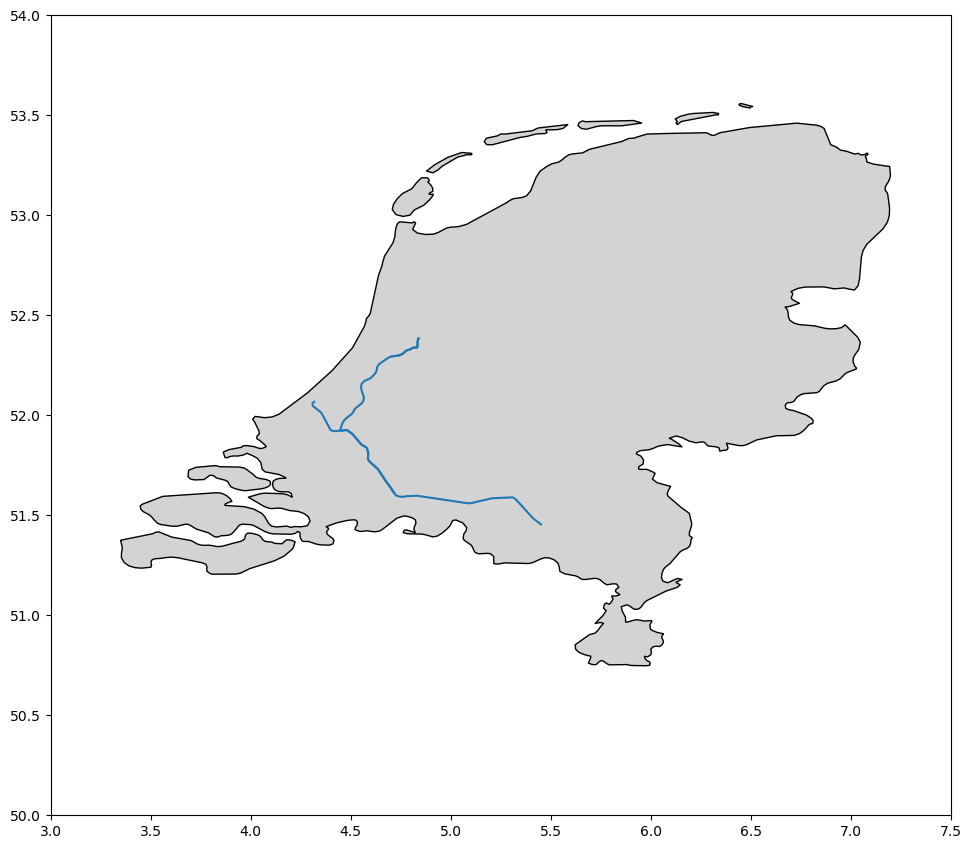

In [12]:
#Nederland plotten
netherlands_shapefile_path = "ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"
world = gpd.read_file(netherlands_shapefile_path)
netherlands = world[world['NAME'] == "Netherlands"]
fig = plt.figure(figsize=[12,8])
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim([3,7.5])
ax.set_ylim([50,54])
netherlands.plot(ax=ax,  color='lightgray', edgecolor='black')

Intercitys.plot(ax=ax)

In [13]:
import folium
import geopandas as gpd

# Function to plot GeoDataFrame interactively using Folium
def plot_folium(gdf):
    # Step 1: Create a base Folium map
    # Initialize the map centered on the mean of the coordinates
    m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=8)

    # Step 2: Add each geometry (LineString or Polygon) to the map
    folium.GeoJson(gdf).add_to(m)

    # Step 3: Return the map for interactive display
    return m

# Example: Plotting the previously created GeoDataFrame (gdf_routes)
map_interactive = plot_folium(Intercitys.set_crs(epsg=4326))

# Step 4: Display the map (if running in a notebook environment, this will display the map)
map_interactive


C:\Users\thijs\AppData\Local\Temp\ipykernel_62784\895395900.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=8)
